# Logistic Regression Theory

Notebook to go through theory behind logistic regression with formulas and examples

## 1. Imports

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats._continuous_distns import _distn_names
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## 2. Regression Basics

Linear regression is a great tool for examining relationships between a set of 'independent variables' (X) and a dependent variable (y)

e.g. how correlated is someone's height (y) with their {weight, age, sex, ethnicity}?

This is expressed mathematically as:

$$y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +...+ \beta_n x_n + \epsilon$$

where we attach weights / sensitivities $\beta$ to each of our Xs with $\alpha$ an overall 'bias'

The problem then becomes finding the above weights to best fit our observed data - we can define this as minimising the square between $\hat{y}$ and $y$ where $\hat{y}$ is the prediction that our above model would spit out

$$min_{\alpha, \beta} \sum_i^n{(y - \hat{y})^2}$$

Substituting in:
$$min_{\alpha, \beta} \sum_i^n{(y - (\alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +...+ \beta_n x_n))^2}$$

We can then differentiate this wrt our n+1 params to get n+1 eq and n+1 unknowns

## 3. Issue for Binary Classification

The above model assumes that y is a continuous unbounded variable - this doesn't work if we are looking at categorical or binary variables

Instead we need something to 'squash' this onto the interval (0,1) where we can then interpret the value as the probability of getting y=1 (for binary classifier)

The issues with using linear regression for binary classification are well explained [here](https://christophm.github.io/interpretable-ml-book/logistic.html#what-is-wrong-with-linear-regression-for-classification):

"Since the predicted outcome is not a probability, but a linear interpolation between points, there is no meaningful threshold at which you can distinguish one class from the other. A good illustration of this issue has been given on Stackoverflow.

Linear models do not extend to classification problems with multiple classes. You would have to start labeling the next class with 2, then 3, and so on. The classes might not have any meaningful order, but the linear model would force a weird structure on the relationship between the features and your class predictions. The higher the value of a feature with a positive weight, the more it contributes to the prediction of a class with a higher number, even if classes that happen to get a similar number are not closer than other classes."

## 4. Logistic / Sigmoid Function

The sigmoid function takes an input x and maps it to the interval (0,1) - this is what we want

$$y = \frac{1}{1 + e^{-x}}$$

In [2]:
x_vals = list(range(-10,10))

def sigmoid(x):
    l = 1 / (1 + math.exp(-x))
    return l

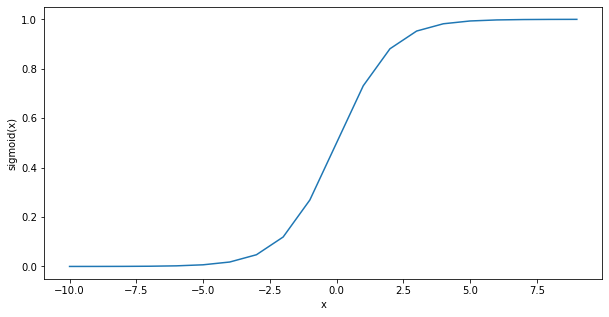

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5));
sns.lineplot(data=pd.DataFrame(data={'y':[sigmoid(x) for x in x_vals], 'x': x_vals}), y='y', x='x', ax=ax);

ax.set_ylabel('sigmoid(x)');

## 5. Logistic Regression Function & Interpretation

We can then combine the two functions above to get the form of our logistic regression:

$$y = P(y=1) =  \frac{1}{1 + e^{-[\alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +...+ \beta_n x_n]}}$$

This then means that $P(y=0)$ is expressed as:

$$P(y=0) = 1 - P(y=1) = \frac{e^{-[\alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +...+ \beta_n x_n]}}{1 + e^{-[\alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +...+ \beta_n x_n]}}$$

We then can ratio these 2 quantities to try to understand what the parameters we estimate mean intuitively:

$$\frac{P(y=1)}{P(y=0)} = e^{[\alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +...+ \beta_n x_n]}$$

And then taking logs of both sides:

$$log(\frac{P(y=1)}{P(y=0)}) = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +...+ \beta_n x_n$$

This shows that we are estimating a linear model for the log odds of the event y=1, where odds are defined [as](https://en.wikipedia.org/wiki/Odds#Mathematical_relations):

$$odds = \frac{P(y=1)}{1 - P(y=1)}$$

Now, we can see what the parameters mean if we e.g. increase $x_1$ by a small increment

Taking the ratio of the odds with a small increase in x vs before we get:

$$\frac{odds_{x_{1+1}}}{odds} = \frac{e^{[\alpha + \beta_1 (x_1 + 1) + \beta_2 x_2 + \beta_3 x_3 +...+ \beta_n x_n]}}{e^{[\alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +...+ \beta_n x_n]}}$$

Given the rules of logs we know we can cancel out most of the other terms to get:

$$\frac{odds_{x_{1+1}}}{odds} = e^{\beta_1 (x_1 + 1) - \beta_1 (x_1)} = e^{\beta_1}$$

[As stated here](https://christophm.github.io/interpretable-ml-book/logistic.html#interpretation-1):
 - Each parameter affects the change in the odds in a non-linear way due to the exponential function
 - As for interpretation of $\beta$:
  - "For example, if you have odds of 2, it means that the probability for y=1 is twice as high as y=0. If you have a weight (= log odds ratio) of 0.7, then increasing the respective feature by one unit multiplies the odds by exp(0.7) (approximately 2) and the odds change to 4"

## 6. ML Approach to Multinomial Logistic Regression

ML literature treats logistic regression a bit differently from classical stats / econometrics, in a form that is more generisable to multiclass logistic regression

To set up the problem, let's say:
 - We have K classes that we want to classify our data observations into
 - For each observation, we have the following pair {y, __x__}, where:
  - y is the 'target variable' of what class the observation belongs to
  - __x__ is a vector of observable data points that will help us fit our classifier i.e. a set of 'features'

The problem becomes: How do we train a classifier s.t. we end up with a model/function that we can feed in new observations (sets of __x__) and generate a class prediction?

We can think about it as wanting the following output:
 - A k size vector of outputs that gives us the probability that the obs belongs to that class
 - The sum of the vector is 1 so that we have a 'probability distribution'

To achieve this, we can think of modelling each class as a separate log-linear regression, like the following:

For $N$ observations from $i=1,...,N$ and for $K$ classes from $k=1,...,K$, and for a matrix $\pmb{X}$ NxM dims of N obs and M features:

$$ln P(y_i = k) = \pmb{\beta_k} \pmb{X_i} - ln Z$$

s.t.

$$P(y_i = k) = \frac{e^{\pmb{\beta_k} \pmb{X_i}}}{Z}$$

where we choose $Z$ as a normalising factor to ensure:

$$\sum_{i=1}^{K} P(y_i=k) = 1$$

for every observation $i$

We can figure out what Z should be by re-arranging the above:

$$\sum_{i=1}^{K} \frac{e^{\pmb{\beta_k} \pmb{X_i}}}{Z} = 1$$

giving us:

$$Z = \sum_{i=1}^{K}e^{\pmb{\beta_k} \pmb{X_i}}$$

i.e. Z is a constant across all classes 

This then gives us the following formulation for the probability that an observation $y_i$ belongs to a class $c$:

$$P(y_i = c) = \frac{e^{\pmb{\beta_c} \pmb{X_i}}}{\sum_{i=1}^{K}e^{\pmb{\beta_k} \pmb{X_i}}}$$

The above formulation is known as a [softmax function](https://en.wikipedia.org/wiki/Softmax_function) and bounds our estimates onto the interval $P(x) \in{(0,1)}$

## 6. Estimating the Model

As per the above, for $K$ classes and $M$ features we need to estimate $K M$ parameters i.e. $\beta_1,...,\beta_M$ for each log-linear model for each class $k$

We can use maximum likelihood to define the criteria we want to optimise on i.e. given a set of observations $(\pmb{y}, \pmb{X})$, how can we choose the params $\pmb{\beta}$ to maximise the likelihood of observing that data?

We can write this as:

$$L = \prod_{i=1}^N p_1^{y_1} p_2^{y_2} \cdots p_K^{y_K}$$

where we have the following:
 - For each observation, compute the model probabilities for all K classes of belonging to that class ${p_1, p_2, \cdots, p_K}$
 - Only include the probability $p_k$ if it is the true class i.e. if $y_k$ is the correct class (this is handled by exponent of $y_k$)
 - Do this for all observations from $i=1,\cdots,N$
 - Multiply them altogether - this is the quantity we want to maximise

Can see that this quantity has a maximum of N --> if we get it perfectly right every time with a model that spits out probability of 1 for the true class every time

Can re-write as:

$$L = \prod_{i=1}^N \prod_{j=1}^K p_{ij}^{y_{ij}}$$

This quantity is then commonly taken logs of and negated so we have the 'cross-entropy' function which we then aim to minimise using a gradient descent algorithm

Links:

https://stackoverflow.com/questions/61662278/why-mnlogit-returns-classes-num-1-params-and-how-get-them-all

https://en.wikipedia.org/wiki/Multinomial_logistic_regression

http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf

http://www.utstat.toronto.edu/~rsalakhu/sta4273_2012/notes/Lecture3_2012.pdf


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://stats.stackexchange.com/questions/52104/multinomial-logistic-regression-vs-one-vs-rest-binary-logistic-regression

https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html

## 7. Other Useful Resources

[Here](https://stats.stackexchange.com/questions/22381/why-not-approach-classification-through-regression): a good article on what logistic regression is on stats exchange vs linear regression or pure class predictors like SVM



[Here](https://stats.stackexchange.com/questions/949/when-is-logistic-regression-solved-in-closed-form): A good article on stats exchange on why logistic regression cannot be solved analytically like linear regression. This is due to the fact that the prediciton by construction is not linear in the parameters (as we squash it into the interval (0,1) and so cannot be solved using linear algebra). Instead we use a loss function defned by MLE and use gradient descent to find the optimal parameter set $(\alpha, \beta)$ for our model.